#Matplotlib reference notebook

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import norm
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline

In [7]:
mpl.matplotlib_fname()

'/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/mpl-data/matplotlibrc'

In [8]:
mpl.style.available

AttributeError: 'module' object has no attribute 'style'

In [4]:
mpl.style.use('fivethirtyeight')

AttributeError: 'module' object has no attribute 'style'

###Pylab or Matplotlib
####I don't use pylab mode. I use matplotlib mode
####pylab has a number of silent imports, including

####import numpy as np
####import matplotlib.pyplot as plt
####from pylab import *

####While convenient it can cause confusion 
####e.g. it replaces the builtin sum() function with numpy's sum() function

###Matplotlib provides two types of interface. 

####The Matlab-like interface. 

####Matplotlib maintains a pointer to the current figure, current axis, etc. and directs top-level commands to those places:

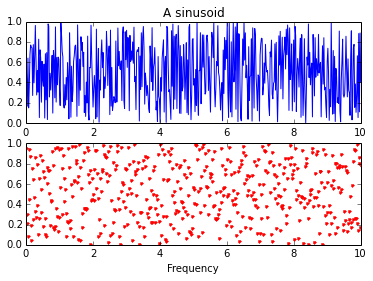

In [9]:
x = np.linspace(0, 10, 500)
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first plot
plt.plot(x, np.random.rand(500))
plt.title('A sinusoid')

plt.subplot(2, 1, 2)  # 2 rows, 1 column, second plot
plt.plot(x, np.random.rand(500), 'r.')
plt.xlabel('Frequency')

In [13]:
mpl.style.use('ggplot')
import matplotlib
print matplotlib.__version__


AttributeError: 'module' object has no attribute 'style'

####The object-oriented interface.

####Matplotlib allows us to pass around references to the plot elements :

In [8]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(2, 1, 1) #2 rows, 1 column, plot number 1
ax1.plot(x, np.random.rand(500), 'g.')
ax1.set_title("Randomness")

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(x, np.random.rand(500), 'y-')
ax2.set_xlabel('Frequency')


####The interfaces are not mutually exclusive, which means you can (and I often do!) mix the commands.

####This is not really best practice!!

####The object oriented interface is really the one to use and learn.

####So try and avoid the "plt.command" commands, and use the "ax.command" type of commands.

###The Figure object

The figure object represents the canvas for the plot or plots. If subplots are used then figure or canvas will hold all of the subplots. This leads to having to size the figure appropriately.

####Plot a single point

In [9]:
fig = plt.figure()
a_set_of_axes = fig.add_subplot(1,1,1) #1 row, 1 column, first plot
print a_set_of_axes
a_set_of_axes.plot(3,4,'o') #x = 3, y = 4, use a filled o as the symbol, no color specified

In [10]:
mpl.style.use('bmh')

###Explore different kinds of plots - histograms, scatter plots

In [11]:
fig = plt.figure(figsize=(10,10)) #The canvas needs to be 10 across to allow for 2 5-by-5 plots, and 10 down for the
                                    #same reason

ax1 = fig.add_subplot(2,2,1) #2 rows, 2 cols, first plot
ax2 = fig.add_subplot(2,2,2) #2 rows, 2 cols, second plot
ax3 = fig.add_subplot(2,2,3) #2 rows, 2 cols, third plot

ax1.plot(np.random.randn(50).cumsum(), 'r--') #random cumulative sum, plot in red
ax2.hist(np.random.randn(100), bins=20, color='b', alpha=0.3) #histogram with 20 bins, in blue, partially transparent
ax3.scatter(np.arange(30), np.arange(30)+3*np.random.randn(30)) #scatter plot

In [12]:
mpl.style.use('dark_background')

###Matplotlib autoscales plot limits independently, unless overidden

In [13]:
fig, axes = plt.subplots(2,2, sharex=True, sharey=True) #with this configuration, set up 4 sets of axes
print axes
axes[0,0].plot(np.random.randn(30).cumsum(), 'g--') #just use the first axis, at location 0 row, 0 col
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2) 

####wspace = 0.2 above, 0.5 below  : the amount of width reserved for blank space between subplots

####hspace = 0.2 above, 0.5 below   :the amount of height reserved for white space between subplots

In [14]:
mpl.style.use('ggplot')

In [15]:
fig, axes = plt.subplots(2,2, sharex=True, sharey=True) #with this configuration, set up 4 sets of axes
print axes
axes[0,0].plot(np.random.randn(30).cumsum(), 'g--') #just use the first axis, at location 0 row, 0 col
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)

In [16]:
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)

###Color and line style abbreviation
####green dashes 'g--', but also using *linestyle='--'* and *color='g'*
####full RGB addresses can also be used '#CECECE'

###Markers
####either 'ko--' for black, or *marker='o'*, *color = 'k'*, *linestyle = '--'*

####More examples - matplotlib interpolates between markers, but this can be changes. *drawstyle='steps-post'*

In [17]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.plot(np.random.randn(10).cumsum(), color='r', linestyle='--', marker='o')
ax2.plot(np.random.randn(10).cumsum(), color='g', linestyle='--', marker='o', drawstyle='steps-post')
print plt.xlim()
print plt.ylim()

####The default is to interpolate

###Ticks, labels and legends
####if you do use plt.xlim, plt.ylim, etc, then these act on the active or most recently plotted subplot
####or (better)
####use *set_* functions

In [18]:
fig = plt.figure(figsize=(10,5)) #10 across as we have 2 plots on 1 row and 5 down as we only have 1 row

ax1 = fig.add_subplot(1,2,1) #1 row, 2 cols, first plot
ax1.plot(np.random.randn(10).cumsum(), color='r', linestyle='--', marker='o')
ax1.set_xticks([1.0, 2.0, 3.0, 4.0, 5.0, 6.0])
ax1.set_xticklabels(['One', 'Two', 'Three', 'Four', 'Five', 'Six'], rotation=45, fontsize='large')
ax1.set_xlabel('Index')
plt.xlim(0,6) #better to use ax1.set_xlim(0,5)
plt.ylim(-10,10)


ax2 = fig.add_subplot(1,2,2) #1 row, 2 cols, 2nd plot
ax2.plot(np.random.randn(10), color='g', linestyle='--', marker='o', drawstyle='steps-post')
ax2.set_xlim(0,20)
ax2.set_ylim(0,2)

###Legends

In [19]:
mean = 0;
sigma = 1

#The formula for the normal distribution
f=lambda i: 1.0/np.sqrt(2.0*np.pi*sigma*sigma) * np.exp((i-mean)*(i-mean)/(-2.0*sigma*sigma))

x = np.linspace(-3,3,50)
p = [f(p) for p in x]

In [112]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2,1,1)

#set the label for the legend here
ax1.plot(x, p, color='r', linestyle='--', marker='o', label='Normal')
ax1.set_xlim(-3,3)
ax1.set_xticks([-1.0, 0.0, 1.0])
ax1.set_xticklabels(['Minus One', 'Zero', 'One'], rotation=-45, fontsize='large')

#create a legend using the 'best' location. Whatever labels were used will appear in the legend
ax1.legend(loc='best')
ax1.set_ylabel("p of x")
ax1.set_xlabel("x")
ax1.set_title("The Normal Distribution")

ax2 = fig.add_subplot(2,1,2, sharey=ax1)
ax2.plot(x, p, color='g', linestyle='--', marker='.', drawstyle='steps-post', label='Normal Steps-Post')
plt.xlim(-3,3)
plt.ylim(0, 0.5)

#create legends using the 'best' location. Whatever labels were used will appear in the legend
plt.legend(loc='best')

###Dive into the detail of matplotlib and you can configure pretty much anything!

In [20]:
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(1,1,1)
ax1.set_frame_on(False)
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()
#ax1.axes.get_yaxis().set_visible(False)
#ax1.axes.get_xaxis().set_visible(True)

ax1.plot(np.random.randn(10).cumsum(), color='r', linestyle='--', marker='o')
ax1.set_xticks([1.0, 2.0, 3.0, 4.0, 5.0, 6.0])
ax1.set_xticklabels(['One', 'Two', 'Three', 'Four', 'Five', 'Six'], rotation=0, fontsize='small')
ax1.set_xlabel('Index')

##3-D Plots are a bit more complicated

In [21]:
D = 2
MU = np.zeros(D)
SIGMA = np.matrix('9.0 0.0; 0.0 9.0')
SIGMA1 = np.matrix('7.0 0.0; 0.0 25.0')
SIGMA2 = np.matrix('5.0 5.0; 5.0 10.0')

def norm_D(X, MU, SIGMA, D):
    temp1 = 1.0/np.power(2.0 * np.pi, float(D)/2.)    
    temp2 = 1.0/np.sqrt(np.linalg.det(SIGMA))    
    Xm = np.matrix(X)    
    MUm = np.matrix(MU)    
    temp3 = np.matrix(Xm-MUm)    
    temp4 = np.dot(temp3, np.linalg.inv(SIGMA))    
    temp5 = np.dot(temp4, np.transpose(temp3))    
    temp6 = -0.5 * np.matrix.item(temp5)
    return temp1 * temp2 * np.exp(temp6)

In [22]:
fig = plt.figure(figsize=(15,45))

ax = fig.add_subplot(3, 1, 1, projection='3d')

X = np.arange(-10, 10, 0.25)
A = len(X)
Y = np.arange(-10, 10, 0.25)
X, Y = np.meshgrid(X, Y)

Z=[]
for i in range(A):
    for j in range(A):
        Z.append(norm_D([X[i][j], Y[i][j]], MU, SIGMA, D))

Z = np.array(Z)
Z = Z.reshape(A, A)

ax.elev=45.0
ax.azim=90.0
ax.set_title("identity cov matrix - circles")
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=True)

###label = '_nolegend_'
###savefig("my_figure"+".png")

http://www.astro.washington.edu/users/vanderplas/Astr599/notebooks/12_AdvancedMatplotlib